In [2]:
import h5py
import scipy.io as io
import PIL.Image as Image
import numpy as np
import os
import glob
from matplotlib import pyplot as plt
from scipy.ndimage import gaussian_filter 
import scipy
import json
import torchvision.transforms.functional as F
from matplotlib import cm as CM
from image import *
from model import CSRNet
import torch
%matplotlib inline

In [3]:
from torchvision import datasets, transforms
transform=transforms.Compose([
                       transforms.ToTensor(),transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225]),
                   ])

In [4]:
root = '/home/leeyh/Downloads/Shanghai/'

In [5]:
#now generate the ShanghaiA's ground truth
part_A_train = os.path.join('part_A_final/train_data','images')
part_A_test = os.path.join('part_A_final/test_data','images')
part_B_train = os.path.join('part_B_final/train_data','images')
part_B_test = os.path.join('part_B_final/test_data','images')
path_sets = [part_A_test]

In [6]:
img_paths = []
for path in path_sets:
    for img_path in glob.glob(os.path.join(path, '*.jpg')):
        img_paths.append(img_path)

In [7]:
model = CSRNet().cpu()
map_location=torch.device('cpu')

C:\Users\abhishekgupta.AD\AppData\Roaming\Python\Python312\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\abhishekgupta.AD\AppData\Roaming\Python\Python312\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [8]:
# model = model.cuda()

In [9]:
checkpoint = torch.load('PartBmodel_best.pth.tar', map_location=torch.device('cpu'), weights_only=False)


In [10]:
model.load_state_dict(checkpoint['state_dict'])

<All keys matched successfully>

In [11]:
mae = 0
for i in range(len(img_paths)):
    img = 255.0 * F.to_tensor(Image.open(img_paths[i]).convert('RGB'))

    img[0,:,:]=img[0,:,:]-92.8207477031
    img[1,:,:]=img[1,:,:]-95.2757037428
    img[2,:,:]=img[2,:,:]-104.877445883
    img = img.cpu()
    #img = transform(Image.open(img_paths[i]).convert('RGB')).cuda()
    gt_file = h5py.File(img_paths[i].replace('.jpg','.h5').replace('images','ground_truth'),'r')
    groundtruth = np.asarray(gt_file['density'])
    output = model(img.unsqueeze(0))
    mae += abs(output.detach().cpu().sum().numpy()-np.sum(groundtruth))
    print (i,mae)
print (mae/len(img_paths))

0 4660.8594
1 12070.419
2 17933.602
3 21575.727
4 26046.367
5 30830.83
6 42740.562
7 48114.6
8 59710.594
9 61379.254
10 65640.664
11 73717.516
12 87129.99
13 94727.32
14 97466.695
15 103642.56
16 105012.12
17 107316.92
18 113400.07
19 116244.484
20 137617.39
21 140927.8
22 148117.36
23 148777.5
24 151019.61
25 170908.11
26 178388.83
27 180858.92
28 183733.83
29 189228.92
30 194174.78
31 198476.3
32 202659.83
33 203378.38
34 216639.48
35 232518.2
36 241563.5
37 245339.17
38 247266.9
39 248854.06
40 249491.97
41 250419.06
42 262060.72
43 265428.75
44 268713.53
45 276102.47
46 278181.47
47 287719.4
48 291290.8
49 293464.16
50 297748.62
51 302469.1
52 305550.03
53 312719.72
54 314852.44
55 317605.28
56 322431.0
57 332361.6
58 333669.78
59 339199.38
60 344413.25
61 350605.78
62 355024.56
63 358598.66
64 364534.44
65 368718.53
66 373906.66
67 378555.88
68 380029.88
69 380890.0
70 386285.97
71 388041.28
72 391481.7
73 398229.06
74 402342.75
75 403911.44
76 408406.34
77 412135.78
78 428232.06


Predicted Count :  246


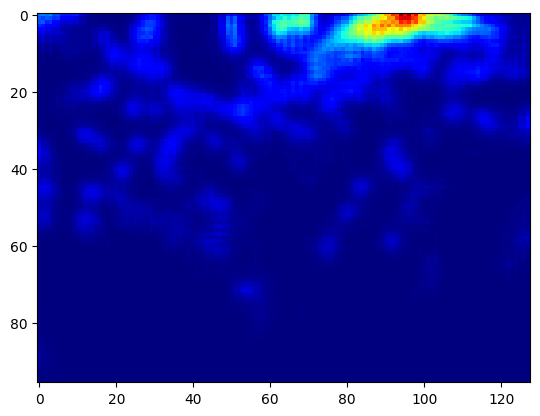

Original Count :  265


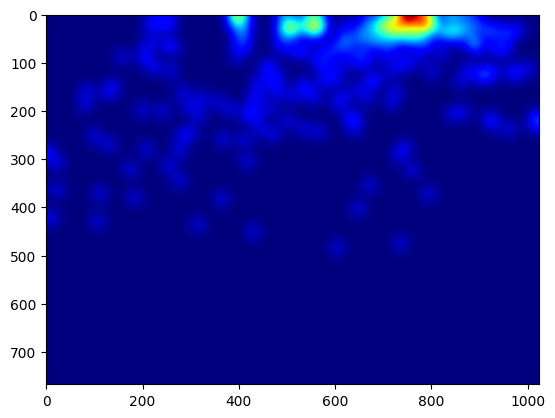

Original Image


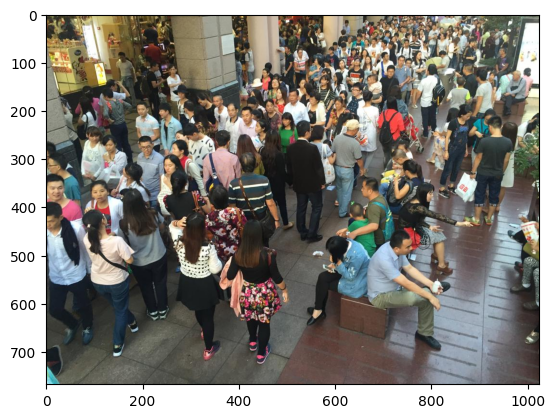

In [18]:
import matplotlib.pyplot as plt
from matplotlib import cm as c

img = transform(Image.open('part_B_final/test_data/images/IMG_50.jpg').convert('RGB')).cpu()

output = model(img.unsqueeze(0))
print("Predicted Count : ",int(output.detach().cpu().sum().numpy()))
temp = np.asarray(output.detach().cpu().reshape(output.detach().cpu().shape[2],output.detach().cpu().shape[3]))
plt.imshow(temp,cmap = c.jet)
plt.show()
temp = h5py.File('part_B_final/test_data/ground_truth/IMG_50.h5', 'r')
temp_1 = np.asarray(temp['density'])
plt.imshow(temp_1,cmap = c.jet)
print("Original Count : ",int(np.sum(temp_1)) + 1)
plt.show()
print("Original Image")
plt.imshow(plt.imread('part_B_final/test_data/images/IMG_50.jpg'))
plt.show()

Predicted Count : 17


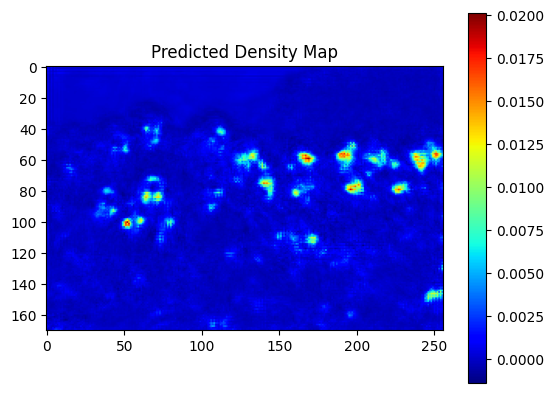

Original Image


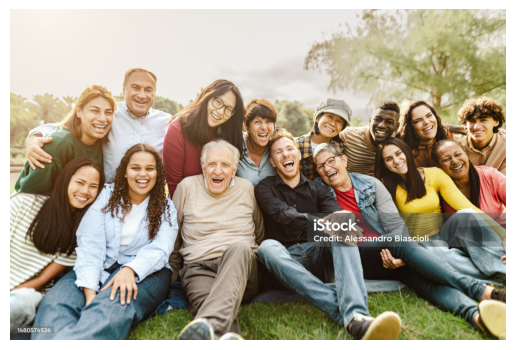

In [22]:
from matplotlib import pyplot as plt
from matplotlib import cm as c
from PIL import Image
import torch
import numpy as np

# Load and transform the image
img_path = 'images/istockphoto-1480574526-2048x2048.jpg'  # Replace with your actual image path
img = transform(Image.open(img_path).convert('RGB'))  # No .cuda()

# Move model to CPU if not already
model = model.cpu()

# Predict using the model
output = model(img.unsqueeze(0))  # Still fine on CPU

# Get the predicted count
predicted_count = int(output.detach().sum().numpy())
print("Predicted Count :", predicted_count)

# Visualize the predicted density map
density_map = output.detach().squeeze().numpy()
plt.imshow(density_map, cmap=c.jet)
plt.title("Predicted Density Map")
plt.colorbar()
plt.show()

# Visualize the original image
print("Original Image")
plt.imshow(plt.imread(img_path))
plt.axis('off')
plt.show()
